# Linear Regression


In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [19]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

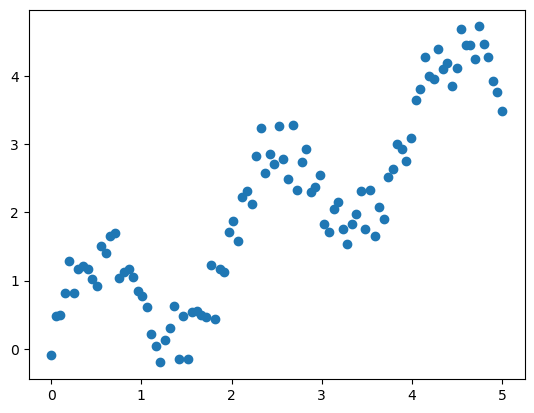

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [20]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5012680440061411


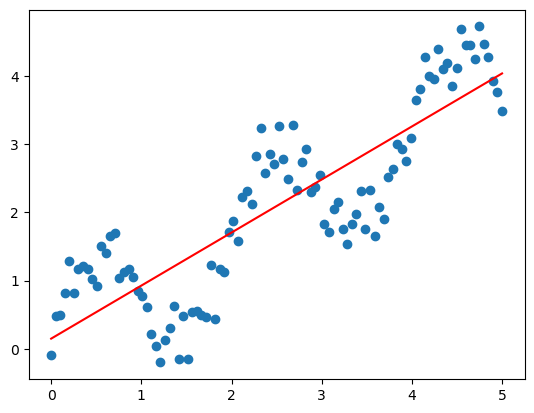

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5, k**6] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 6)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

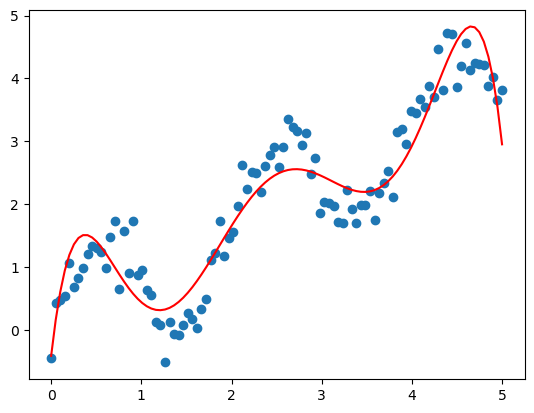

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [22]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [ 12.62441152 -27.45558848  23.05251362  -8.83485124   1.57278296
  -0.10547815]
interception:  -0.4122849146352632


In [23]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([-0.41228491,  0.15819181,  0.60563254,  0.9458631 ,  1.193451  ,
        1.36176437,  1.46302952,  1.50838729,  1.50794815,  1.47084605,
        1.40529092,  1.31862004,  1.21734807,  1.10721579,  0.9932377 ,
        0.87974821,  0.7704467 ,  0.66844124,  0.57629106,  0.49604779,
        0.42929543,  0.37718904,  0.34049215,  0.31961303,  0.31463949,
        0.32537266,  0.35135929,  0.39192296,  0.44619391,  0.51313771,
        0.59158255,  0.68024541,  0.77775685,  0.8826846 ,  0.99355588,
        1.10887846,  1.22716043,  1.34692879,  1.46674666,  1.58522933,
        1.70105903,  1.81299838,  1.91990266,  2.02073078,  2.11455496,
        2.20056922,  2.27809657,  2.34659491,  2.40566172,  2.45503749,
        2.49460785,  2.52440444,  2.5446046 ,  2.55552966,  2.55764212,
        2.55154147,  2.53795876,  2.51774996,  2.49188801,  2.46145362,
        2.42762484,  2.39166533,  2.35491139,  2.31875771,  2.28464192,
        2.25402776,  2.22838716,  2.20918087,  2.19783799,  2.19

In [24]:
regr_poly.predict(X_poly)

array([-0.41228491,  0.15819181,  0.60563254,  0.9458631 ,  1.193451  ,
        1.36176437,  1.46302952,  1.50838729,  1.50794815,  1.47084605,
        1.40529092,  1.31862004,  1.21734807,  1.10721579,  0.9932377 ,
        0.87974821,  0.7704467 ,  0.66844124,  0.57629106,  0.49604779,
        0.42929543,  0.37718904,  0.34049215,  0.31961303,  0.31463949,
        0.32537266,  0.35135929,  0.39192296,  0.44619391,  0.51313771,
        0.59158255,  0.68024541,  0.77775685,  0.8826846 ,  0.99355588,
        1.10887846,  1.22716043,  1.34692879,  1.46674666,  1.58522933,
        1.70105903,  1.81299838,  1.91990266,  2.02073078,  2.11455496,
        2.20056922,  2.27809657,  2.34659491,  2.40566172,  2.45503749,
        2.49460785,  2.52440444,  2.5446046 ,  2.55552966,  2.55764212,
        2.55154147,  2.53795876,  2.51774996,  2.49188801,  2.46145362,
        2.42762484,  2.39166533,  2.35491139,  2.31875771,  2.28464192,
        2.25402776,  2.22838716,  2.20918087,  2.19783799,  2.19

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [26]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [27]:
sigma = 0.3

In [28]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [29]:
regr_rbf = LinearRegression()

In [30]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

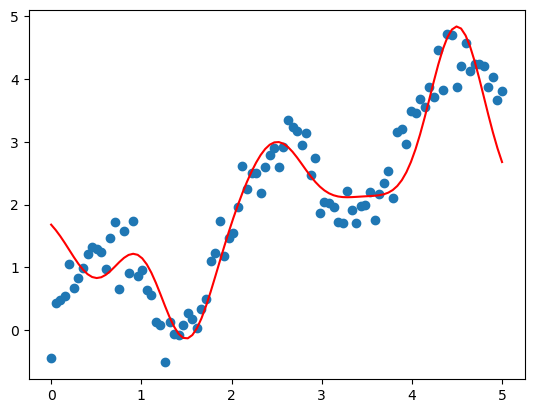

In [31]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [32]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.12252304 -2.09527007  1.04494786  0.1576571   2.87775883]
interception:  1.9591929842604676


#### Comparison

In [33]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

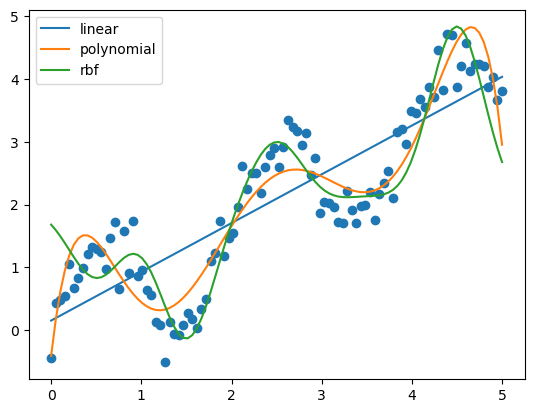

In [34]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [35]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5044234277420008


In [36]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.19130439191493906


In [37]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24547421257151888
